In [117]:
# Import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
# Step 1 Data Preprocessing
# Import the data

diabetes = pd.read_csv('e:/Datasets/diabetes.csv')

In [119]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [120]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [121]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [122]:
# drop the columns which are not required such as ID and unnamed
# diabetes.drop(['Insulin','SkinThickness' ],axis=1,inplace=True)

In [123]:
# Step 2 is Model Building
# Split the data into train and test sets

from sklearn.model_selection import train_test_split

In [124]:
# define X and Y

X = diabetes.drop('Outcome',axis=1)
y = diabetes['Outcome']

In [125]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [126]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [127]:
# Splitting the data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30)

In [128]:
# Import the Algorithm

from sklearn.neighbors import KNeighborsClassifier

In [160]:
# Initialize the model
dia_model=KNeighborsClassifier(27) # K value = 21

In [161]:
# Train the model
dia_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform')

In [162]:
# Step 3  Predictions

predictions=dia_model.predict(X_test)

In [163]:
# Look at classification and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix

In [164]:
print (classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       154
           1       0.76      0.53      0.63        77

    accuracy                           0.79       231
   macro avg       0.78      0.72      0.74       231
weighted avg       0.78      0.79      0.78       231



In [165]:
# Confusion Matrix
print (confusion_matrix(y_test,predictions))

[[141  13]
 [ 36  41]]


In [153]:
len(X_test)

231

In [136]:
# find out the best value for K
# Using Elbow method

error_rate=[]
for i in range(1,50):
    testmodel = KNeighborsClassifier(n_neighbors=i)
    testmodel.fit(X_train,y_train)
    test_predictions = testmodel.predict(X_test)
    error_rate.append(np.mean(test_predictions != y_test))

In [137]:
error_rate

[0.30303030303030304,
 0.2597402597402597,
 0.2987012987012987,
 0.2683982683982684,
 0.2857142857142857,
 0.2554112554112554,
 0.2510822510822511,
 0.2510822510822511,
 0.23809523809523808,
 0.2554112554112554,
 0.26406926406926406,
 0.24242424242424243,
 0.23809523809523808,
 0.23809523809523808,
 0.22943722943722944,
 0.23809523809523808,
 0.24242424242424243,
 0.24675324675324675,
 0.24675324675324675,
 0.23809523809523808,
 0.23809523809523808,
 0.24242424242424243,
 0.24675324675324675,
 0.2554112554112554,
 0.24675324675324675,
 0.22943722943722944,
 0.21212121212121213,
 0.2510822510822511,
 0.24242424242424243,
 0.24242424242424243,
 0.23376623376623376,
 0.2510822510822511,
 0.2683982683982684,
 0.26406926406926406,
 0.26406926406926406,
 0.2554112554112554,
 0.2597402597402597,
 0.2597402597402597,
 0.2510822510822511,
 0.2597402597402597,
 0.2597402597402597,
 0.26406926406926406,
 0.2554112554112554,
 0.2727272727272727,
 0.2727272727272727,
 0.26406926406926406,
 0.277056

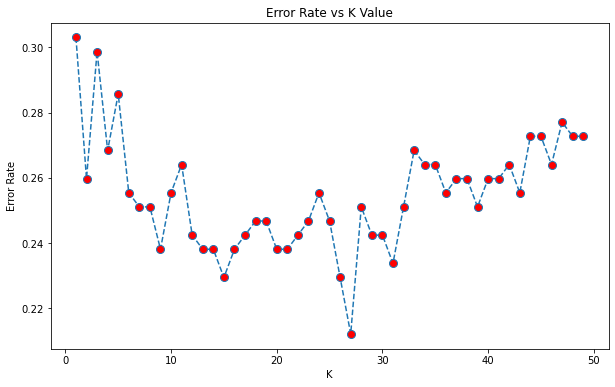

In [166]:
# plot error to know K value

plt.figure(figsize=(10,6))

plt.plot(range(1,50),error_rate,linestyle='dashed',marker='o',markerfacecolor='red',markersize=8)

plt.title('Error Rate vs K Value')

plt.xlabel('K')
plt.ylabel('Error Rate')

plt.show()

In [139]:
# Saving the model
import joblib


In [140]:
joblib.dump(dia_model,'e:/Model/diamodel')

['e:/Model/diamodel']